In [ ]:
pip install pykan

In [ ]:
import timeit
from kan import *

In [ ]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model1 = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


In [ ]:
ggfrom kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.cos(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

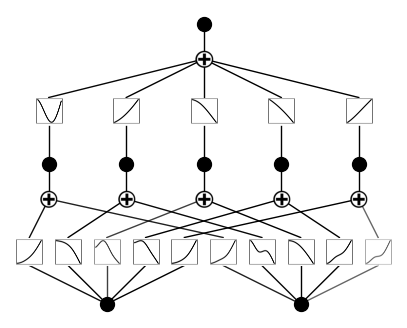

In [ ]:
# plot KAN at initialization
model1(dataset['train_input']);
model1.plot()

In [ ]:
# train the model
start_time = timeit.default_timer()
model1.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);
elapsed_time1 = timeit.default_timer() - start_time

NameError: name 'model1' is not defined

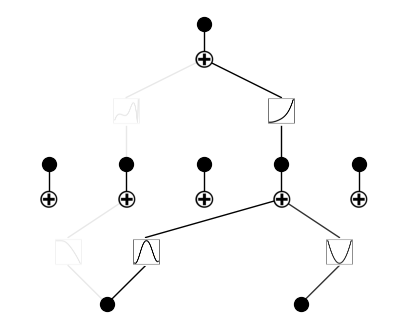

In [ ]:
model1.plot()

saving model version 0.2


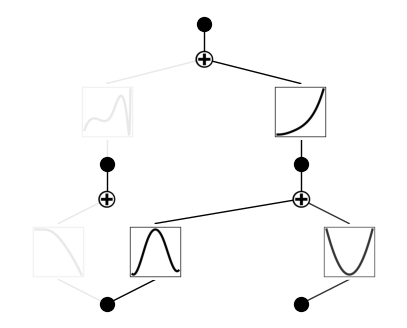

In [ ]:
start_time = timeit.default_timer()
model1 = model1.prune()
elapsed_time2 = timeit.default_timer() - start_time
model1.plot()

In [ ]:
start_time = timeit.default_timer()
model1.fit(dataset, opt="LBFGS", steps=50);
elapsed_time3 = timeit.default_timer() - start_time

| train_loss: 1.03e-02 | test_loss: 1.03e-02 | reg: 9.21e+00 | : 100%|█| 50/50 [00:14<00:00,  3.55it

saving model version 0.3


In [ ]:
start_time = timeit.default_timer()
model1 = model1.refine(10)
elapsed_time4 = timeit.default_timer() - start_time

saving model version 0.4


In [ ]:
start_time = timeit.default_timer()
model1.fit(dataset, opt="LBFGS", steps=50);
elapsed_time5 = timeit.default_timer() - start_time

| train_loss: 3.24e-04 | test_loss: 3.49e-04 | reg: 8.32e+00 | : 100%|█| 50/50 [00:16<00:00,  2.96it

saving model version 0.5


In [ ]:
start_time = timeit.default_timer()
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model1.fix_symbolic(0,0,0,'sin');
    model1.fix_symbolic(0,1,0,'x^2');
    model1.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs','cos']
    model1.auto_symbolic(lib=lib)
elapsed_time6 = timeit.default_timer() - start_time

fixing (0,0,0) with sin, r2=0.9968391774498031, c=2
fixing (0,0,1) with sin, r2=0.9999998945222779, c=2
fixing (0,1,0) with 0
fixing (0,1,1) with x^2, r2=0.999999976317177, c=2
fixing (1,0,0) with x, r2=0.06362223769598219, c=1
fixing (1,1,0) with exp, r2=0.9999999898106481, c=2
saving model version 0.6


In [ ]:
start_time = timeit.default_timer()
model1.fit(dataset, opt="LBFGS", steps=50);
elapsed_time7 = timeit.default_timer() - start_time

| train_loss: 2.81e-13 | test_loss: 2.50e-13 | reg: 0.00e+00 | : 100%|█| 50/50 [00:08<00:00,  6.24it

saving model version 0.7


In [ ]:
from kan.utils import ex_round

ex_round(model1.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1 + 1.5708))